<a href="https://colab.research.google.com/github/Bengalaz/TF-201715721/blob/master/TF201715721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import csv
from numpy import Inf
import heapq
from collections import defaultdict
from collections import deque
import random

url_calles = 'https://raw.githubusercontent.com/Bengalaz/TF-201715721/master/data/Lima-calles.csv'
identifiers = ['id','name','number_intersections']
lima_calles = pd.read_csv(url_calles,sep=";", header=None, names=identifiers)

#!wget -O Lima-intersecciones.csv https://raw.githubusercontent.com/Bengalaz/TF-201715721/master/data/Lima-intersecciones.csv
url_intersecciones = 'https://raw.githubusercontent.com/Bengalaz/TF-201715721/master/data/Lima-intersecciones.csv'
identifiers = ['id', 'street_id','street_name', 'source_id', 'destiny_id','int_start_id', 'int_end_id', 'distance',
               'speed','cost', 'inverse_cost', 'lat_Origin_Inter', 'long_Origin_Inter','lat_End_Inter', 'long_End_Inter']
df = pd.read_csv(url_intersecciones, sep=";", header=None, names=identifiers)
df.head(10)



,id,street_id,street_name,source_id,destiny_id,int_start_id,int_end_id,distance,speed,cost,inverse_cost,lat_Origin_Inter,long_Origin_Inter,lat_End_Inter,long_End_Inter
0,1,4827820,Plaza 2 de Mayo,31035122,31035142,1,6,0.038973,70,0.000557,1000000.0,-12.045931,-77.042783,-12.046096,-77.043090
1,2,4827820,Plaza 2 de Mayo,31035142,31035109,6,90275,0.004040,70,0.000058,1000000.0,-12.046096,-77.043090,-12.046125,-77.043111
2,3,4827820,Plaza 2 de Mayo,31035109,31035110,90275,79,0.018227,70,0.000260,1000000.0,-12.046125,-77.043111,-12.046277,-77.043175
3,4,4827820,Plaza 2 de Mayo,31035110,31035112,79,51668,0.037674,70,0.000538,1000000.0,-12.046277,-77.043175,-12.046603,-77.043112
4,5,4827820,Plaza 2 de Mayo,31035112,31035113,51668,7,0.010827,70,0.000155,1000000.0,-12.046603,-77.043112,-12.046678,-77.043048
5,6,4827820,Plaza 2 de Mayo,31035113,31035116,7,10,0.072327,70,0.001033,1000000.0,-12.046678,-77.043048,-12.046695,-77.042435
6,7,4827820,Plaza 2 de Mayo,31035116,31035117,10,89757,0.022975,70,0.000328,1000000.0,-12.046695,-77.042435,-12.046520,-77.042322
7,8,4827820,Plaza 2 de Mayo,31035117,310954401,89757,3473,0.007704,70,0.000110,1000000.0,-12.046520,-77.042322,-12.046454,-77.042302
8,9,4827820,Plaza 2 de Mayo,310954401,31035119,3473,3472,0.028386,70,0.000405,1000000.0,-12.046454,-77.042302,-12.046202,-77.042325
9,10,4827820,Plaza 2 de Mayo,31035119,31035121,3472,2,0.041075,70,0.000587,1000000.0,-12.046202,-77.042325,-12.045953,-77.042592


## Gráfico de las intersecciones

In [ ]:
fig = px.scatter_mapbox(df, lat="lat_Origin_Inter", lon="long_Origin_Inter", zoom=10, mapbox_style="carto-positron")
fig.show()

In [ ]:
#Calculando el peso de las aristas
def calculate_edge_weight(fila):
    edge_weight = fila["distance"] *fila["speed"] *fila["cost"] 
    return edge_weight

df["edge_weight"] = df.apply(calculate_edge_weight, axis = 1)
df.head()

    


,id,street_id,street_name,source_id,destiny_id,int_start_id,int_end_id,distance,speed,cost,inverse_cost,lat_Origin_Inter,long_Origin_Inter,lat_End_Inter,long_End_Inter,edge_weight
0,1,4827820,Plaza 2 de Mayo,31035122,31035142,1,6,0.038973,70,0.000557,1000000.0,-12.045931,-77.042783,-12.046096,-77.043090,0.001519
1,2,4827820,Plaza 2 de Mayo,31035142,31035109,6,90275,0.004040,70,0.000058,1000000.0,-12.046096,-77.043090,-12.046125,-77.043111,0.000016
2,3,4827820,Plaza 2 de Mayo,31035109,31035110,90275,79,0.018227,70,0.000260,1000000.0,-12.046125,-77.043111,-12.046277,-77.043175,0.000332
3,4,4827820,Plaza 2 de Mayo,31035110,31035112,79,51668,0.037674,70,0.000538,1000000.0,-12.046277,-77.043175,-12.046603,-77.043112,0.001419
4,5,4827820,Plaza 2 de Mayo,31035112,31035113,51668,7,0.010827,70,0.000155,1000000.0,-12.046603,-77.043112,-12.046678,-77.043048,0.000117


In [ ]:
#Filtrando las columnas necesarias
data_set = df[["street_id","destiny_id","edge_weight"]]
data_set


,street_id,destiny_id,edge_weight
0,4827820,31035142,0.001519
1,4827820,31035109,0.000016
2,4827820,31035110,0.000332
3,4827820,31035112,0.001419
4,4827820,31035113,0.000117
...,...,...,...
84668,248759468,2554985990,0.015390
84669,248759468,2554988470,0.007037
84670,248760457,1756333189,0.000530
84671,248760457,1273978310,0.002219


In [ ]:
data_frame_copy = df[['street_id', 'lat_Origin_Inter', 'long_Origin_Inter', 'lat_End_Inter', 'long_End_Inter', 'distance', 'speed', 'cost']].copy()
data_frame_copy['start_coordinates'] = data_frame_copy[['lat_Origin_Inter', 'long_Origin_Inter']].apply(lambda x: (x[0], x[1]), axis=1)
data_frame_copy['end_coordinates'] = data_frame_copy[['lat_End_Inter', 'long_End_Inter']].apply(lambda x: (x[0], x[1]), axis=1)
data_frame_copy

,street_id,lat_Origin_Inter,long_Origin_Inter,lat_End_Inter,long_End_Inter,distance,speed,cost,start_coordinates,end_coordinates
0,4827820,-12.045931,-77.042783,-12.046096,-77.043090,0.038973,70,0.000557,"(-12.0459308, -77.0427831)","(-12.0460958, -77.0430896)"
1,4827820,-12.046096,-77.043090,-12.046125,-77.043111,0.004040,70,0.000058,"(-12.0460958, -77.0430896)","(-12.0461253, -77.0431113)"
2,4827820,-12.046125,-77.043111,-12.046277,-77.043175,0.018227,70,0.000260,"(-12.0461253, -77.0431113)","(-12.0462768, -77.0431753)"
3,4827820,-12.046277,-77.043175,-12.046603,-77.043112,0.037674,70,0.000538,"(-12.0462768, -77.0431753)","(-12.0466033, -77.0431118)"
4,4827820,-12.046603,-77.043112,-12.046678,-77.043048,0.010827,70,0.000155,"(-12.0466033, -77.0431118)","(-12.0466783, -77.0430483)"
...,...,...,...,...,...,...,...,...,...,...
84668,248759468,-11.767173,-77.170535,-11.768156,-77.170209,0.124055,40,0.003101,"(-11.7671727, -77.1705346)","(-11.7681558, -77.1702095)"
84669,248759468,-11.768156,-77.170209,-11.768890,-77.170385,0.083888,40,0.002097,"(-11.7681558, -77.1702095)","(-11.76889, -77.1703849)"
84670,248760457,-11.768890,-77.170385,-11.768842,-77.170591,0.023016,40,0.000575,"(-11.76889, -77.1703849)","(-11.7688417, -77.1705905)"
84671,248760457,-11.768842,-77.170591,-11.768724,-77.171006,0.047110,40,0.001178,"(-11.7688417, -77.1705905)","(-11.7687239, -77.1710062)"


In [ ]:
#Sacando los datos del df en listas para crear el grafo Lima-intersecciones.csv
from pprint import pprint
streets = []
destinations = []
weights = []

for row in data_set["street_id"].unique():
    str(streets.append(row))
        
for row in data_set["destiny_id"]:
    str(destinations.append(row))

for row in data_set["edge_weight"]:
    weights.append(row)



print(streets)
#print(destinations)
#print(weights)

[4827820, 4827822, 4827827, 4827828, 4827829, 4827832, 4827838, 4827843, 4827844, 4827845, 4827846, 4827847, 4827849, 4827850, 4827860, 4827863, 4827876, 4827878, 4827883, 4827892, 4827894, 4827895, 4827896, 4827908, 4827909, 4827926, 4827929, 4827937, 4827949, 4827951, 4828013, 4828021, 4828025, 4828026, 4828352, 4828405, 4828407, 4828408, 4828411, 4828501, 4828731, 4828738, 4828743, 4828763, 4828802, 4831287, 4831299, 4831340, 4831347, 4831356, 4831386, 4831397, 4831400, 4832777, 4832854, 4832867, 4832868, 4832866, 4832881, 4832882, 4832890, 4832968, 4832972, 4832976, 4832980, 4832984, 4832991, 11979291, 11979547, 11979621, 11979631, 11979694, 11980143, 11980556, 11980154, 11980165, 11980238, 11980258, 11980676, 11980717, 11980702, 11980743, 11981788, 11981820, 11981861, 11981891, 11985087, 11985865, 11985886, 11986252, 11986321, 11986518, 11986778, 11987056, 11987159, 11988366, 11988370, 11989209, 11988505, 11988547, 11988566, 11988580, 11988611, 11989273, 11989414, 11989455, 125612

## Incluyendo las coordenas de las intersecciones a las calles


In [ ]:
z = data_frame_copy.groupby(["street_id"])['distance'].sum()
x = data_frame_copy.groupby(["street_id"])['speed'].mean()
c = data_frame_copy.groupby(["street_id"])['cost'].mean()
v = data_frame_copy.groupby(["street_id"])['start_coordinates'].apply(set)
b = data_frame_copy.groupby(["street_id"])['end_coordinates'].apply(set)

df_combinated = pd.DataFrame(v).join(b, on='street_id').join(z, on='street_id').join(x, on='street_id').join(c, on='street_id')
df_combinated['id'] = [x[0] for x in df_combinated.iterrows()]

In [ ]:
colum = ['start_coordinates', 'end_coordinates']
def add_group(start, end):
  for i in end:
    start.add(i)
  return start

df_combinated['conjunt'] = df_combinated[colum].apply(lambda row: add_group(row.values[0], row.values[1]), axis=1)
df_combinated

,start_coordinates,end_coordinates,distance,speed,cost,id,conjunt
street_id,,,,,,,
4827820,"{(-12.0459528, -77.0425923), (-12.0462768, -77...","{(-12.0459308, -77.0427831), (-12.0466783, -77...",0.303198,70.0,0.000394,4827820,"{(-12.0459528, -77.0425923), (-12.0462768, -77..."
4827822,"{(-12.0437464, -77.0427216), (-12.0435317, -77...","{(-12.0435317, -77.0424959)}",0.034784,70.0,0.000497,4827822,"{(-12.0437464, -77.0427216), (-12.0435317, -77..."
4827827,"{(-12.056207, -77.0420426), (-12.0567463, -77....","{(-12.0567463, -77.0420077), (-12.0571748, -77...",1.467760,70.0,0.001398,4827827,"{(-12.056207, -77.0420426), (-12.0567463, -77...."
4827828,"{(-12.0482875, -77.0424257), (-12.047715, -77....","{(-12.047715, -77.042483), (-12.0466949, -77.0...",1.459433,70.0,0.001737,4827828,"{(-12.0482875, -77.0424257), (-12.047715, -77...."
4827829,"{(-12.0414592, -77.0430441), (-12.0413142, -77...","{(-12.0413142, -77.0430584), (-12.0404055, -77...",0.285529,60.0,0.001190,4827829,"{(-12.0414592, -77.0430441), (-12.0413142, -77..."
...,...,...,...,...,...,...,...
246935554,"{(-11.9949716, -77.0994396), (-11.9947143, -77...","{(-11.9949716, -77.0994396), (-11.9965916, -77...",1.195702,60.0,0.001246,246935554,"{(-11.9949716, -77.0994396), (-11.9947143, -77..."
246935558,"{(-12.0029041, -77.095253), (-12.0024841, -77....","{(-12.0021845, -77.0955148), (-12.0025928, -77...",1.198794,60.0,0.000999,246935558,"{(-12.0029041, -77.095253), (-12.0024841, -77...."
248759468,"{(-11.76889, -77.1703849), (-11.7681558, -77.1...","{(-11.76889, -77.1703849), (-11.7681558, -77.1...",0.207943,40.0,0.002599,248759468,"{(-11.76889, -77.1703849), (-11.7681558, -77.1..."


In [ ]:
#Se demora ejecutar
map_df = df_combinated[['id', 'distance', 'speed', 'cost']].copy()
start_points = []
end_points = []

for row in df_combinated.itertuples():
    start_points.append([ id for x, id in zip(df_combinated['conjunt'], df_combinated['id'])  
              if len(x.intersection(row.conjunt)) > 0 and id != row.id])

In [ ]:
map_df['routes'] = start_points
map_df
map_df.head(10)

,id,distance,speed,cost,routes
street_id,,,,,
4827820,4827820,0.303198,70.0,0.000394,"[4827827, 4827828, 4828025, 28316968, 28317001..."
4827822,4827822,0.034784,70.0,0.000497,"[144954706, 157935082]"
4827827,4827827,1.467760,70.0,0.001398,"[4827820, 4827843, 27455459, 28316933, 2831696..."
4827828,4827828,1.459433,70.0,0.001737,"[4827820, 4827843, 42211168, 42213129, 7522693..."
4827829,4827829,0.285529,60.0,0.001190,"[4827838, 4827844, 111888318, 111925865, 14495..."
4827832,4827832,0.284152,70.0,0.004059,"[4827846, 157935083]"
4827838,4827838,0.284309,70.0,0.004062,"[4827829, 4827844, 144954708]"
4827843,4827843,0.378178,70.0,0.000360,"[4827827, 4827828, 11981861, 11981891, 2822417..."
4827844,4827844,0.107300,70.0,0.000766,"[4827829, 4827838, 4827847, 4827849]"


##Trafico

In [ ]:
obstruction = [30, 60, 120, 180]
time = 0 

map_df['traffic_factor'] = obstruction[time] * map_df['distance']
map_df.head()


,id,distance,speed,cost,routes,traffic_factor
street_id,,,,,,
4827820,4827820,0.303198,70.0,0.000394,"[4827827, 4827828, 4828025, 28316968, 28317001...",9.095937
4827822,4827822,0.034784,70.0,0.000497,"[144954706, 157935082]",1.043523
4827827,4827827,1.467760,70.0,0.001398,"[4827820, 4827843, 27455459, 28316933, 2831696...",44.032809
4827828,4827828,1.459433,70.0,0.001737,"[4827820, 4827843, 42211168, 42213129, 7522693...",43.782999
4827829,4827829,0.285529,60.0,0.001190,"[4827838, 4827844, 111888318, 111925865, 14495...",8.565861


In [ ]:
def trafficIntensity():
  temp = []

  for i in range(24):
    if i < 4:
      intensity = round(random.uniform(0,0.3),2)
    else:
      intensity = round(random.uniform(0.3,5),2)
    temp.append(intensity)

  return temp

## Usando Dikstra para hallar el camino más corto

In [ ]:
graph = defaultdict(list);
for index, row in map_df.iterrows():
  for i, p in enumerate(row["routes"]):
    graph[int(row['id'])].append((int(p), int((row['traffic_factor']) + 1) * (i % 4 + 1)))
graph


defaultdict(list,
            {4827820: [(4827827, 10),
              (4827828, 20),
              (4828025, 30),
              (28316968, 40),
              (28317001, 10),
              (28317005, 20),
              (75226945, 30),
              (118506027, 40),
              (121289998, 10),
              (172099444, 20)],
             4827822: [(144954706, 2), (157935082, 4)],
             4827827: [(4827820, 45),
              (4827843, 90),
              (27455459, 135),
              (28316933, 180),
              (28316968, 45),
              (42211168, 90),
              (42213116, 135),
              (42213129, 180),
              (46490672, 45),
              (77526845, 90),
              (77526851, 135),
              (77861291, 180),
              (118632350, 45),
              (126129847, 90),
              (172742936, 135),
              (194875158, 180)],
             4827828: [(4827820, 44),
              (4827843, 88),
              (42211168, 132),
              (422

In [ ]:
def Dijkstra(graph, root):
    graph.pop(1, None) 

    dist = {k:Inf for k in graph.keys()}
    visited = {k:False for k in graph.keys()}
    
    dist[root] = 0  
    priority_queue = [(0, root)]  
   
    while len(priority_queue) > 0:      
        _, u = heapq.heappop(priority_queue)  
        if visited[u]:   
            continue
        
        visited[u] = True  
        
        for v, l in graph[u]:
            if dist[u] + l < dist[v]:
                dist[v] = dist[u] + l
                heapq.heappush(priority_queue, (dist[v], v))

    return dist

In [ ]:
class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list
        self.H = {k:1 for k in self.adjacency_list.keys()}

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n):
        return self.H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None
            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(n) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [ ]:
g = Graph(graph)
distance = Dijkstra(graph, 4827820)
g.a_star_algorithm(4827820, 4827883)


Path found: [4827820, 28317001, 28316999, 173273823, 45763329, 75037353, 75039264, 4827883]


[4827820, 28317001, 28316999, 173273823, 45763329, 75037353, 75039264, 4827883]

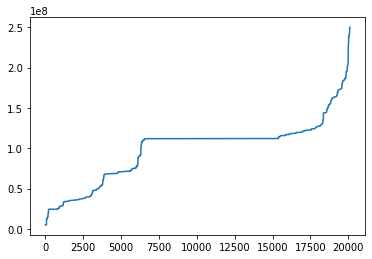

In [ ]:
d = range(1,20095)
plt.plot(d,list(distance))
plt.show()